## Youtube Likes Prediction

### This notebook has been broadly divided into 5 sections:
    1. Describing the dataset
    2. Initial plan for data exploration
    3. Data cleaning and feature engineering
    4. Formulating hypothesis about this data
    5. Conducting a formal significance test for one of the hypotheses
    6. Suggestions for next steps in analyzing this data - Future Scope
    7. Summary

### A. Brief description of the data set and a summary of its attributes

### Introduction

I have taken a Kaggle's youtube videos dataset where the target variable is the ratio of likes to view counts.

Below are the attributes description:

    1. id - Unique Identifier for the row (combindation of video id and trending date)
    2. video_id - Unique Identifier for the video
    3. title - Title of the Video
    4. publishedAt - Datetime the video was published
    5. channelId - Id of the channel hosting the video
    6. channelTitle - Title of the channel hosting the video
    7. categoryId - Video category
    8. trending_date - Date on which we are predicting the view count
    9. tags - Video Tags
    10. view_count - Number of views as of the trending date
    11. likes - Number of likes as of the trending date Not provided in the test set
    12. dislikes - Number of dislikes Not provided in the test set
    13. comment_count Comment Count Not provided in the test set
    14. thumbnail_link Link to the thumbnail of the video.
    15. comments_disabled True/False if comments are disabled.
    16. ratings_disabled True/False if ratings are disabled.
    17. duration_seconds The duration of the video.
    18. has_thumbnail True/False if the thumbnail is available for the video.
    19. description Video description
    20. target TARGET COLUMN - this is the ratio of like to view count.

### Importing libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

warnings.simplefilter('ignore')

%matplotlib inline

### Reading the parquet file

In [2]:
df = pd.read_parquet('train.parquet')
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-12,NaN,True,0.103596
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",M9Pmf9AB4Mo_2020-08-12,NaN,True,0.061611
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,J78aPJ3VyNs_2020-08-12,NaN,True,0.173523
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,kXLn3HkpjaA_2020-08-12,NaN,True,0.046804
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,VIUo6yapDbc_2020-08-12,NaN,True,0.040753


### Row and Col count

In [3]:
df.shape

(92275, 20)

### To see the number of null values and the data types of each attributes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92275 entries, 0 to 92274
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           92275 non-null  object             
 1   title              92275 non-null  object             
 2   publishedAt        92275 non-null  datetime64[ns, UTC]
 3   channelId          92275 non-null  object             
 4   channelTitle       92275 non-null  object             
 5   categoryId         92275 non-null  int64              
 6   trending_date      92275 non-null  object             
 7   tags               92275 non-null  object             
 8   view_count         92275 non-null  int64              
 9   likes              92275 non-null  int64              
 10  dislikes           92275 non-null  int64              
 11  comment_count      92275 non-null  int64              
 12  thumbnail_link     92275 non-null  object     

### Total count of each data type

In [19]:
df.dtypes.value_counts()

object                 9
int64                  5
bool                   3
float64                2
datetime64[ns, UTC]    1
dtype: int64

### B. Initial plan for data exploration

1. Visualize the count of True and False values in categorical features: comments_disabled, ratings_disabled and has_thumbnail
2. Check the correlation using correlation matrix
3. Use boxplot to see the outliers if any
4. Use value_counts() and unique() methods for a detailed description of the data in the features
5. Draw a histplot on categoryId to see the spread over the different categories
6. Use various seaborn visualizations like pairplot, violinplot etc. to understand the data
7. Visualize the missing values using heatmap
8. Visualize whether the key numerical features are normally distributed

In [5]:
bools = ['comments_disabled', 'ratings_disabled', 'has_thumbnail']

### 1) Visualize the count of True and False values in categorical features: comments_disabled, ratings_disabled and has_thumbnail

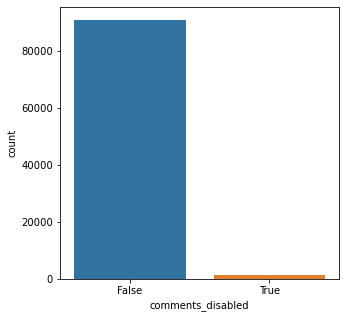

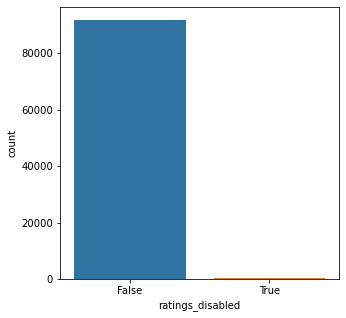

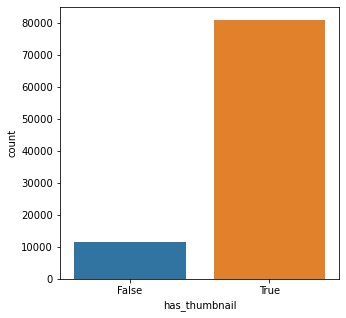

In [6]:
for i in bools:
    plt.figure(figsize=(5,5))
    sns.countplot(df[i])
    plt.show()

### 2) Check the correlation using correlation matrix

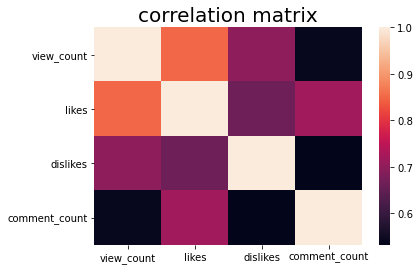

In [7]:
corr_df = df.iloc[:,8:12]
sns.heatmap(corr_df.corr())
plt.title('correlation matrix', fontsize=20)
plt.show()

### 3) Use boxplot to see the outliers if any

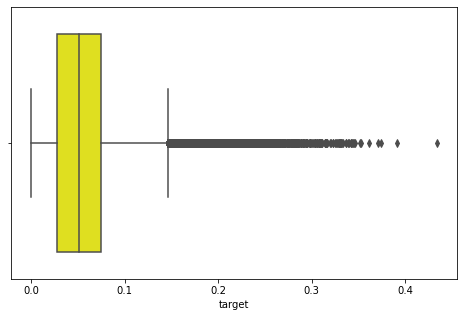

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(df['target'], color='yellow')
plt.show()

### 4)  Use value_counts() and unique() methods for a detailed description of the data in the features

In [9]:
from simple_colors import *

for i in ['channelTitle', 'categoryId']:
    print(blue(i, ['bold', 'underlined']))
    print(df[i].unique())
    print(df[i].value_counts())
    print('\n')

channelTitle
['Brawadis' 'Apex Legends' 'jacksepticeye' ... 'fastASMR'
 'IGoByLotsOfNames' 'WickedBinge']
NFL                 612
NBA                 564
SSSniperWolf        480
MrBeast Gaming      380
SSundee             360
                   ... 
DIY Perks             1
Galantis              1
Michaels Stores       1
fastASMR              1
Jerry Production      1
Name: channelTitle, Length: 4632, dtype: int64


categoryId
[22 20 24 10 26 27 23 28  1 25 17 19 15  2 29]
24    18522
10    16967
20    15593
17    10034
22     8040
23     5126
1      3514
25     3430
28     3326
26     3039
27     2044
2      1668
15      504
19      385
29       83
Name: categoryId, dtype: int64




### 5) Draw a histplot on categoryId to see the spread over the different categories

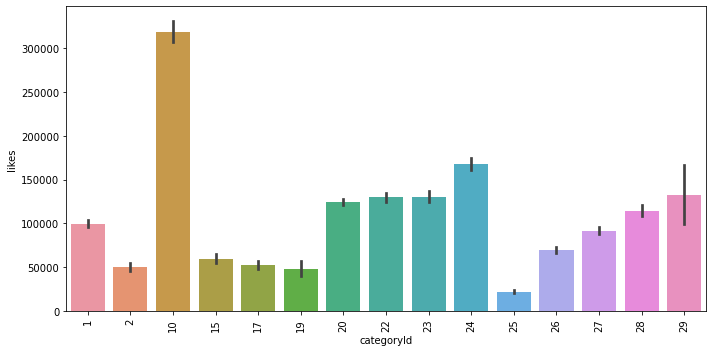

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x='categoryId', y="likes", data=df.sort_values(by='categoryId', ascending=False))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

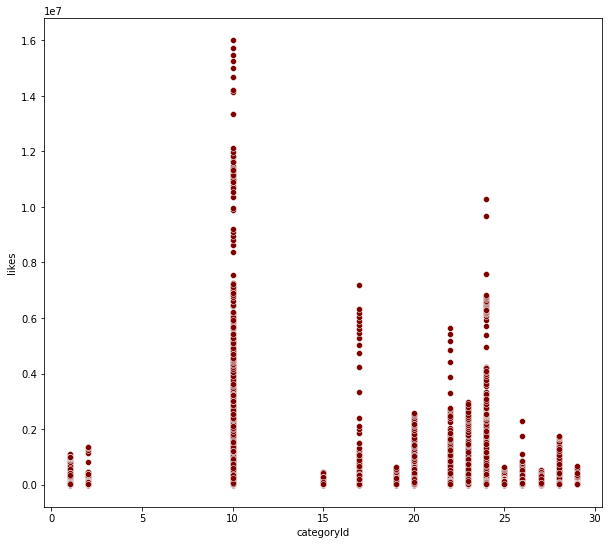

In [11]:
plt.figure(figsize=(10,9))
sns.scatterplot(x='categoryId', y='likes', data=df, legend='brief', color='maroon')
plt.show()

### 6) Use various seaborn visualizations like pairplot, violinplot etc. to understand the data

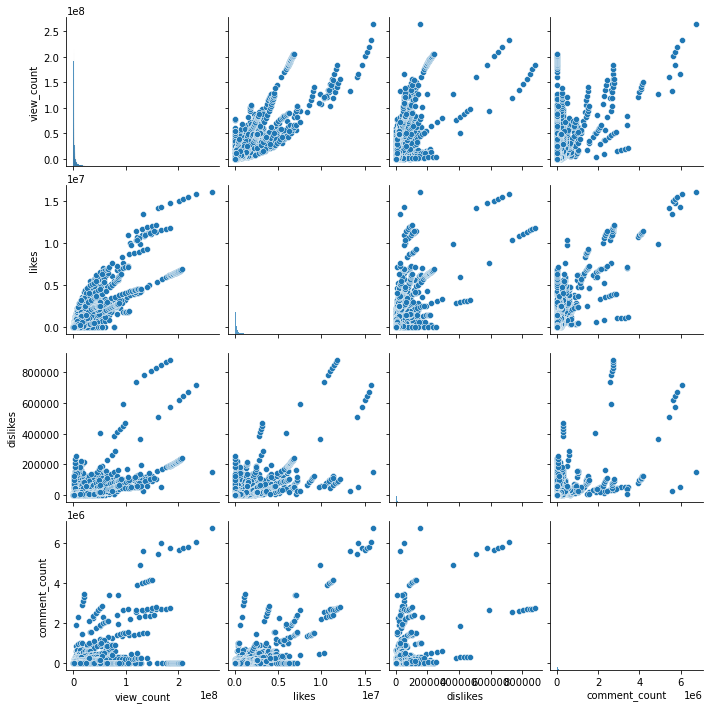

In [12]:
sliced_df = df.iloc[:, 8:12]
sns.pairplot(sliced_df)

<AxesSubplot:xlabel='categoryId'>

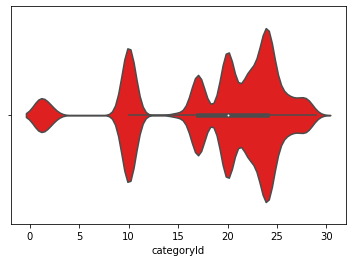

In [13]:
sns.violinplot(df['categoryId'], orient='h', color='red')

### 7) Visualize the missing values using heatmap

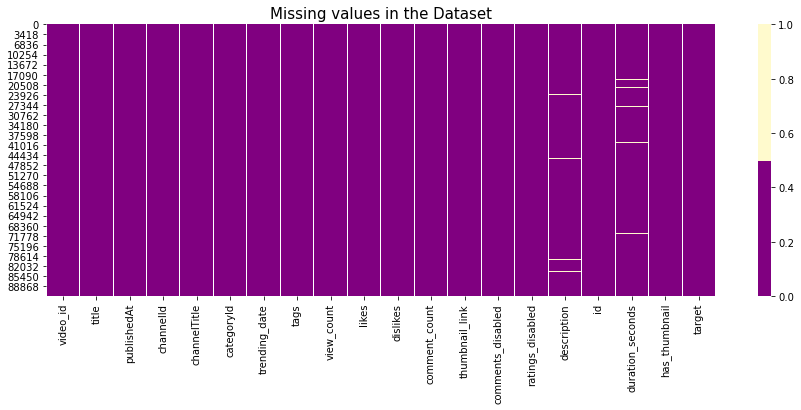

In [14]:
plt.figure(figsize = (15,5))
sns.heatmap(df.isna().values, cmap = ['#800080','#FFFACD'], xticklabels=df.columns)
plt.title("Missing values in the Dataset", size=15);

### 8) Visualize whether the key numerical features are normally distributed

In [20]:
import pylab
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

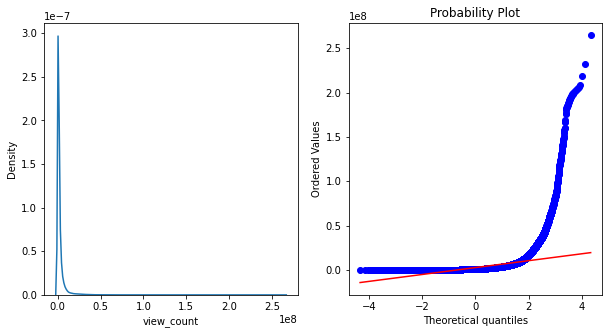

In [21]:
normality(df, 'view_count')

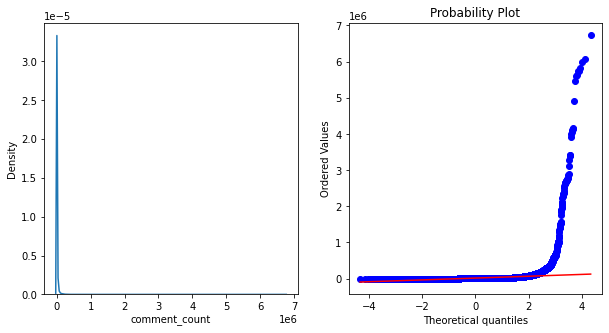

In [23]:
normality(df, 'comment_count')

Both the features have highly right-skewed distribution. We can use different transformation techniques to transform these into normally distributed data. Commonly used transformation methods:

    1. Log
    2. Square Root
    3. Box-cox
    4. Reciprocal
    5. Exponential

### C. Actions taken for data cleaning and feature engineering

1. Remove unnecessary or redundant columns
2. Impute the missing values for duration_seconds features
3. Encoding techniques on categorical features: comments_disabled, ratings_disabled and has_thumbnail
4. Extract date and time from publishedAt column
5. Categorize the values in PublishedTime column into 4 categories: Morning, Noon, Evening, Night
6. Extract another column as net_likes which will be the difference between the likes and dislikes columns
7. Transform view_count feature into normally distributed data

### 1) Remove unnecessary or redundant columns

To avoid model overfitting, getting rid of unnecessary and redundant attributes, for example id and description, is important

### Checking number of unique values per column

In [25]:
for i in df.columns:
    print(i, '=', len(df[i].unique()))

video_id = 16969
title = 17321
publishedAt = 16692
channelId = 4563
channelTitle = 4632
categoryId = 15
trending_date = 461
tags = 12891
view_count = 90915
likes = 71880
dislikes = 12805
comment_count = 25556
thumbnail_link = 16969
comments_disabled = 2
ratings_disabled = 2
description = 17704
id = 92275
duration_seconds = 2328
has_thumbnail = 2
target = 91831


### Dropping the columns with huge number of unique values and the ones which does not provide relevant information as it won't be useful for model training

In [26]:
drop_cols = ['video_id', 'channelId', 'title', 'thumbnail_link', 'description']
short_df = df.drop(drop_cols, axis=1)
short_df.head()

,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,id,duration_seconds,has_thumbnail,target
0,2020-08-11 19:20:14+00:00,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,3C66w5Z0ixs_2020-08-12,NaN,True,0.103596
1,2020-08-11 17:00:10+00:00,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,M9Pmf9AB4Mo_2020-08-12,NaN,True,0.061611
2,2020-08-11 16:34:06+00:00,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,False,False,J78aPJ3VyNs_2020-08-12,NaN,True,0.173523
3,2020-08-11 16:38:55+00:00,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,False,False,kXLn3HkpjaA_2020-08-12,NaN,True,0.046804
4,2020-08-11 15:10:05+00:00,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,False,False,VIUo6yapDbc_2020-08-12,NaN,True,0.040753


### Dropping the target column as well as it is the ratio between likes and view_count and as view_count is provided in the test set our task is just to predict the likes

In [27]:
short_df.drop('target', axis=1, inplace=True)
short_df.head()

,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,id,duration_seconds,has_thumbnail
0,2020-08-11 19:20:14+00:00,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,3C66w5Z0ixs_2020-08-12,NaN,True
1,2020-08-11 17:00:10+00:00,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,M9Pmf9AB4Mo_2020-08-12,NaN,True
2,2020-08-11 16:34:06+00:00,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,False,False,J78aPJ3VyNs_2020-08-12,NaN,True
3,2020-08-11 16:38:55+00:00,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,False,False,kXLn3HkpjaA_2020-08-12,NaN,True
4,2020-08-11 15:10:05+00:00,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,False,False,VIUo6yapDbc_2020-08-12,NaN,True


### 2) Impute the missing values for duration_seconds features

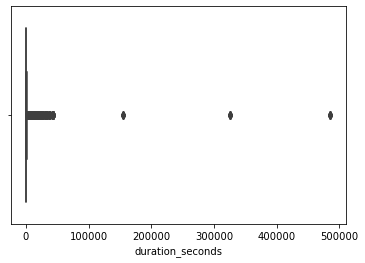

In [28]:
sns.boxplot(short_df['duration_seconds'])
plt.show()

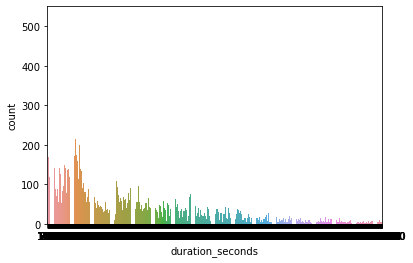

In [29]:
sns.countplot(short_df['duration_seconds'])
plt.show()

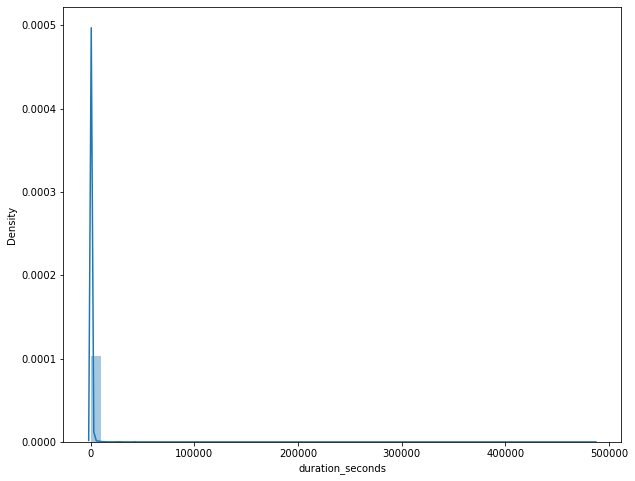

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(short_df.duration_seconds)
plt.show()

### As we see there is unequal distribution of data and there are quite a few outliers hence we use median to replace the missing values

In [31]:
short_df['duration_seconds'] = short_df['duration_seconds'].fillna(short_df['duration_seconds'].median())

In [32]:
short_df['duration_seconds']

0         446.0
1         446.0
2         446.0
3         446.0
4         446.0
          ...  
92270      59.0
92271      58.0
92272     824.0
92273      56.0
92274    1032.0
Name: duration_seconds, Length: 92275, dtype: float64

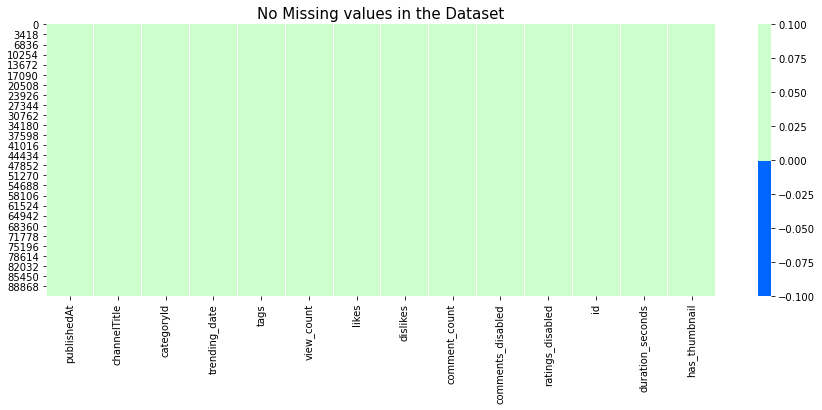

In [33]:
plt.figure(figsize = (15,5))
sns.heatmap(short_df.isna().values, cmap = ['#0066ff','#ccffcc'], xticklabels=short_df.columns)
plt.title("No Missing values in the Dataset", size=15);

### 3) Encoding techniques on categorical features: comments_disabled, ratings_disabled and has_thumbnail

Encoding is a technique to transorm the string values of a feature into numeric values. There are different types of encoding techniques like binary encoding and one-hot encoding. Encoding is required as we cannot pass strings to train our model.

Here we have taken the categorical features into consideration for binary encoding.

In [35]:
for i in bools:
    short_df.replace({i: {True:1, False:0}}, inplace=True)

In [36]:
short_df.head()

,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,id,duration_seconds,has_thumbnail
0,2020-08-11 19:20:14+00:00,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,0,0,3C66w5Z0ixs_2020-08-12,446.0,1
1,2020-08-11 17:00:10+00:00,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,0,0,M9Pmf9AB4Mo_2020-08-12,446.0,1
2,2020-08-11 16:34:06+00:00,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,0,0,J78aPJ3VyNs_2020-08-12,446.0,1
3,2020-08-11 16:38:55+00:00,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,0,0,kXLn3HkpjaA_2020-08-12,446.0,1
4,2020-08-11 15:10:05+00:00,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,0,0,VIUo6yapDbc_2020-08-12,446.0,1


### 4) Extract date and time from publishedAt column

publishedAt column cannot be used directly as it is in date time format. We need to extract the date and time separately for training our model. We can then drop the publishedAt column

In [37]:
short_df['publishedDate'] = short_df.apply(lambda x : str(x['publishedAt'])[:10], axis=1)
short_df['publishedTime'] = short_df.apply(lambda x : str(x['publishedAt'])[10:13], axis=1)
short_df.drop('publishedAt', axis=1, inplace=True)
short_df.head()

,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,id,duration_seconds,has_thumbnail,publishedDate,publishedTime
0,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,0,0,3C66w5Z0ixs_2020-08-12,446.0,1,2020-08-11,19
1,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,0,0,M9Pmf9AB4Mo_2020-08-12,446.0,1,2020-08-11,17
2,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,0,0,J78aPJ3VyNs_2020-08-12,446.0,1,2020-08-11,16
3,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,0,0,kXLn3HkpjaA_2020-08-12,446.0,1,2020-08-11,16
4,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,0,0,VIUo6yapDbc_2020-08-12,446.0,1,2020-08-11,15


### 5) Categorize the values in PublishedTime column into 4 categories: Morning, Noon, Evening, Night

The time of the day when the video was published can be broadly categorized into 4 groups as exact time wouldn't be beneficial for model training

In [39]:
short_df['publishedTime'].value_counts()

 16    9118
 17    8485
 15    6919
 18    6149
 19    6101
 20    5690
 21    5135
 14    4969
 22    4936
 04    4849
 13    4006
 23    3920
 00    3736
 01    2944
 05    2594
 03    2426
 02    2279
 12    2084
 11    1264
 09    1138
 06     937
 10     889
 08     862
 07     845
Name: publishedTime, dtype: int64

In [40]:
short_df["publishedTime"] = pd.to_numeric(short_df["publishedTime"])

In [41]:
short_df['publishedTime'].dtype

dtype('int64')

In [42]:
time = 'publishedTime'

for i in short_df[time].values:
    if i>=4 and i<12:
        short_df.replace({time : {i: 'Morning'}}, inplace=True)
    elif i>=12 and i<18:
        short_df.replace({time : {i: 'Noon'}}, inplace=True)
    elif i>=18 and i<23:
        short_df.replace({time : {i: 'Evening'}}, inplace=True)
    elif i>=23 or i<4:
        short_df.replace({time : {i: 'Night'}}, inplace=True)

In [43]:
short_df.head()

,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,id,duration_seconds,has_thumbnail,publishedDate,publishedTime
0,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,0,0,3C66w5Z0ixs_2020-08-12,446.0,1,2020-08-11,Evening
1,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,0,0,M9Pmf9AB4Mo_2020-08-12,446.0,1,2020-08-11,Noon
2,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,0,0,J78aPJ3VyNs_2020-08-12,446.0,1,2020-08-11,Noon
3,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,0,0,kXLn3HkpjaA_2020-08-12,446.0,1,2020-08-11,Noon
4,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,0,0,VIUo6yapDbc_2020-08-12,446.0,1,2020-08-11,Noon


In [44]:
short_df['publishedTime'].value_counts()

Noon       35581
Evening    28011
Night      15305
Morning    13378
Name: publishedTime, dtype: int64

### 6) Extract another column as net_likes which will be the difference between the likes and dislikes columns

In [45]:
short_df['net_likes'] = abs(short_df['likes'] - short_df['dislikes'])
short_df.head()

,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,id,duration_seconds,has_thumbnail,publishedDate,publishedTime,net_likes
0,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,0,0,3C66w5Z0ixs_2020-08-12,446.0,1,2020-08-11,Evening,151053
1,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,0,0,M9Pmf9AB4Mo_2020-08-12,446.0,1,2020-08-11,Noon,143945
2,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,0,0,J78aPJ3VyNs_2020-08-12,446.0,1,2020-08-11,Noon,351159
3,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,0,0,kXLn3HkpjaA_2020-08-12,446.0,1,2020-08-11,Noon,21395
4,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,0,0,VIUo6yapDbc_2020-08-12,446.0,1,2020-08-11,Noon,44838


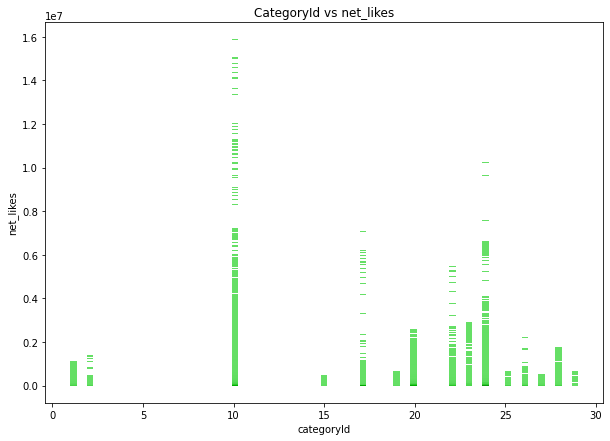

In [46]:
plt.figure(figsize=(10,7))
sns.histplot(x=short_df['categoryId'], y=short_df['net_likes'], color = 'green')
plt.title('CategoryId vs net_likes')
plt.show()

In [47]:
short_df.drop('id', axis=1, inplace=True)
short_df.head()

,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,duration_seconds,has_thumbnail,publishedDate,publishedTime,net_likes
0,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,0,0,446.0,1,2020-08-11,Evening,151053
1,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,0,0,446.0,1,2020-08-11,Noon,143945
2,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,0,0,446.0,1,2020-08-11,Noon,351159
3,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,0,0,446.0,1,2020-08-11,Noon,21395
4,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,0,0,446.0,1,2020-08-11,Noon,44838


### D. Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

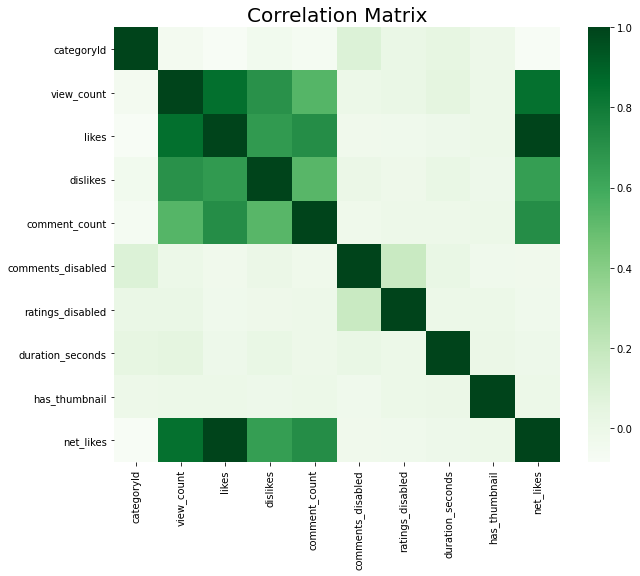

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(short_df.corr(), cmap='Greens')
plt.title('Correlation Matrix', fontsize=20)
plt.show()

#### From the above correlation matrix it is clear that the view_count, dislikes and comment_count columns have huge correlation with our target column (likes)

<AxesSubplot:xlabel='ratings_disabled', ylabel='count'>

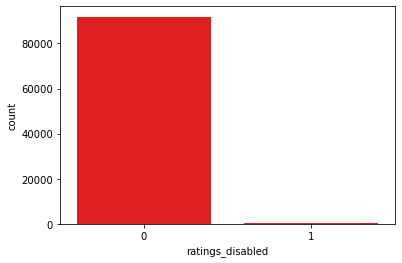

In [49]:
sns.countplot(short_df['ratings_disabled'], color='red')

#### From the above, we conclude that the True values are negligible in ratings_disabled column and also this attribute has very less effect on our target variable as shown in the correlation matrix. Therefore, it is safe to drop it.

In [50]:
from scipy.stats import skew
cat_features = ['view_count', 'dislikes', 'comment_count']

for i in cat_features:
    print(blue(i, ['bold', 'underlined']))
    print('Mean:', short_df[i].mean())
    print('Meadian:', short_df[i].median())
    print('standard Deviation:', short_df[i].std())
    print('Min:', short_df[i].min(), 'Max:', short_df[i].max())
    print('Skewness:', skew(short_df[i], bias=False))
    print('\n')

view_count
Mean: 2779091.2581956107
Meadian: 1100045.0
standard Deviation: 7364112.645729635
Min: 38510 Max: 264407389
Skewness: 13.030952157610031


dislikes
Mean: 3110.9773069628827
Meadian: 852.0
standard Deviation: 13342.743386373326
Min: 0 Max: 879354
Skewness: 31.388899184437093


comment_count
Mean: 13735.741219181793
Meadian: 3856.0
standard Deviation: 96726.82049289922
Min: 0 Max: 6738537
Skewness: 38.19282041913125




### Alternatively

In [51]:
cat_feature = short_df.iloc[:,4:8]
cat_feature.drop('likes', axis=1, inplace=True)
cat_feature.describe()

,view_count,dislikes,comment_count
count,9.227500e+04,92275.000000,9.227500e+04
mean,2.779091e+06,3110.977307,1.373574e+04
std,7.364113e+06,13342.743386,9.672682e+04
min,3.851000e+04,0.000000,0.000000e+00
25%,5.312440e+05,368.000000,1.692000e+03
50%,1.100045e+06,852.000000,3.856000e+03
75%,2.482274e+06,2239.000000,9.322000e+03
max,2.644074e+08,879354.000000,6.738537e+06


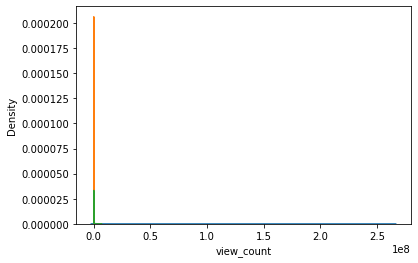

In [52]:
for i in cat_features:
    sns.kdeplot(short_df[i])

### 7) Transform view_count feature into normally distributed data

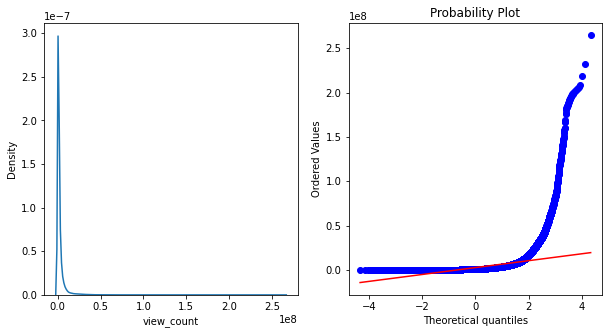

In [53]:
normality(short_df, 'view_count')

In [54]:
# performing logarithmic transformation on the feature
short_df['view_count']=np.log(short_df['view_count'])

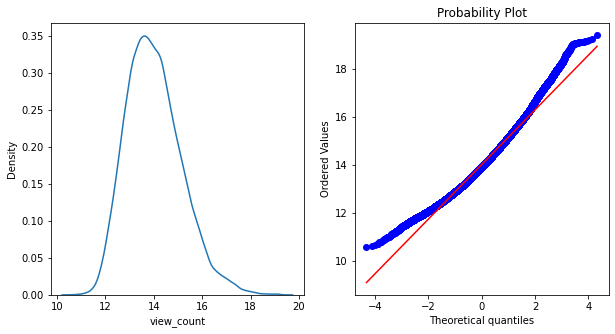

In [55]:
#plotting to check the transformation
normality(short_df,'view_count')

#### Above is the univariate analysis for view_count, dislikes and comment_count columns. We conclude that there are many outliers as the mean and median differ a lot and all the features are highly positively skewed

### E. Formulating hypothesis about this data

1. Relationship between likes and view_count is 0 in youtube video population

2. Average comment_count of categoryId 10 differs from the population

3. trending_date does not have any effect on likes3

4. Assuming that duration_seconds feature is normally distributed

### F. Conducting a formal significance test for one of the hypotheses

#### Null Hypothesis: Relationship between likes and view_count is 0 in youtube video population
#### Alternative Hypothesis: Relationship between likes and view_count is not 0 in youtube video population

#### Significance value: 0.05

In [56]:
class1 = short_df.view_count
class2 = short_df.likes
print(np.var(class1), np.var(class2))

ratio_check = np.var(class2)/np.var(class1)

print(ratio_check)

print(stats.ttest_ind(a=class1, b=class2, equal_var=True))

1.317391069693217 191384707294.2937
145275546264.984
Ttest_indResult(statistic=-105.61821131323308, pvalue=0.0)


#### Conclusion: Since the p-value is 0, we can reject the null hypothesis, which means the alternative hypothesis of 'Relationship between likes and view_count is not 0 in youtube video population' holds true

### G. Suggestions for next steps in analyzing this data - Future Scope

1. As a next step, we can try to analyze the remaining categorical features (channelTitle and Tags) further and extract useful information which will help us decide whether it is required to consider these attributes while model building
2. We would check whether the trending_Date feature provides any additional information or can we proceed just with the publishedDate and publishedTime
3. We can categoriza the publishedDate into months or perhaps different time of the month.
4. Use encoding technique on the categorical feature: publishedTime 
5. Check for the scope of time-series analysis
6. Test the remaining hypothesis
7. Convert features into normally distributed data

### H. A paragraph that summarizes the quality of this data set and a request for additional data

This dataset was quite clean with very few features with missing values. Though the dataset had redundant attributes, it was easy to identify and remove them.

It would have been beneficial for our model to have few more relevant features like:

    1. comments (to determine the probablity of likes based on text)
    2. LIVE (was the video hosted live or was it an uploaded version)
    3. Shares (No. of times the video was shared)